# Guia 2. Modelos Supervisados - Clasificación
### Marian Alejandra Sierra Aranzazu

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [99]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data  

In [100]:
data_path= "heart_disease_uci (1).csv"
df = pd.read_csv(data_path)
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Evaluamos data faltante:

In [101]:
print(missing_data(df))

          Total   Percent
ca          611  0.664130
thal        486  0.528261
slope       309  0.335870
fbs          90  0.097826
oldpeak      62  0.067391
trestbps     59  0.064130
exang        55  0.059783
thalch       55  0.059783
chol         30  0.032609
restecg       2  0.002174
cp            0  0.000000
dataset       0  0.000000
id            0  0.000000
age           0  0.000000
sex           0  0.000000
num           0  0.000000


In [102]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


The dataset provides a detailed view into heart disease research with the following characteristics:
El dataset contiene a detalle casos de enfermedades cardiacas con diferentes caracteristicas.
* 920 casos con 16 variables
* Variables: 'id', 'age', 'sex', 'dataset', 'cp', y target: 'num'.
* Datos faltantes:
'ca': 66.41% 
'thal': 52.82%


### Variables categoricas

In [104]:

categorical_variables = df.select_dtypes(include=['object', 'category']).columns
value_counts_dict = {}

for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

data_list = []

for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))
        
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])
value_counts_df = value_counts_df.set_index('Variable')
value_counts_df

,Category,Count
Variable,,
sex,Male,726
sex,Female,194
dataset,Cleveland,304
dataset,Hungary,293
dataset,VA Long Beach,200
dataset,Switzerland,123
cp,asymptomatic,496
cp,non-anginal,204
cp,atypical angina,174


In [105]:
df = df.drop(columns=['id','ca','thal'])

In [106]:
#tratamiento de nulos
missing_threshold = 35 #no deberia ser 35 pero no nos vamos a complicar :)  
target_variable = 'num'

numerical_cols = [
    col 
    for col in df.columns 
    if (
        (df[col].dtype in ['int64', 'float64']) and 
        (df[col].isnull().sum() / len(df) * 100) < missing_threshold  and
        (col != target_variable)  
    )]

categorical_cols = [col
                   for col in df.columns 
                   if (
                        df[col].dtype == 'object') and 
                        (df[col].isnull().sum() / len(df) * 100) < missing_threshold]

#imputacion con simple imputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])



### Observacion
* la data podria estar desbalanceada por sexo, y por cp (muchos asintomaticos)

In [107]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

la variable target también esta desbalanceada, hay mas de 400 casos concentrados en una sola clase. Para abordarlo mejor, considero convertir esto en una clasificacion binaria.

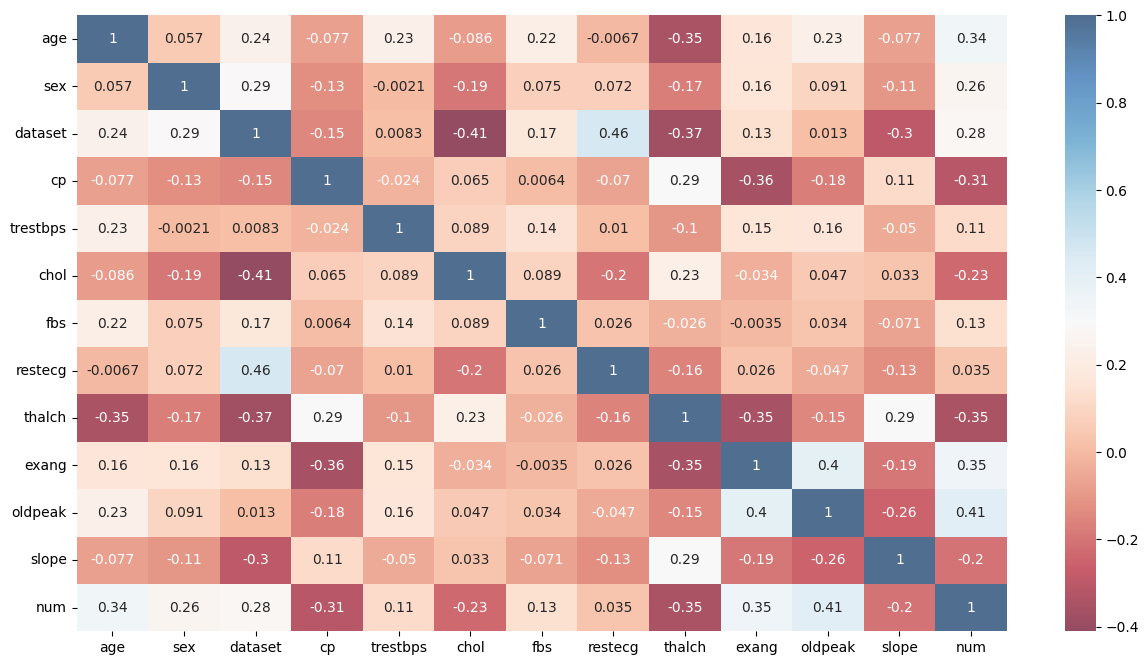

In [108]:
df_cor = df.copy()
sns.set_palette("pastel")
cat_cols = df_cor.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    df_cor[col] = LabelEncoder().fit_transform(df_cor[col])


correlation_matrix = df_cor.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df_cor[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False)
plt.show()

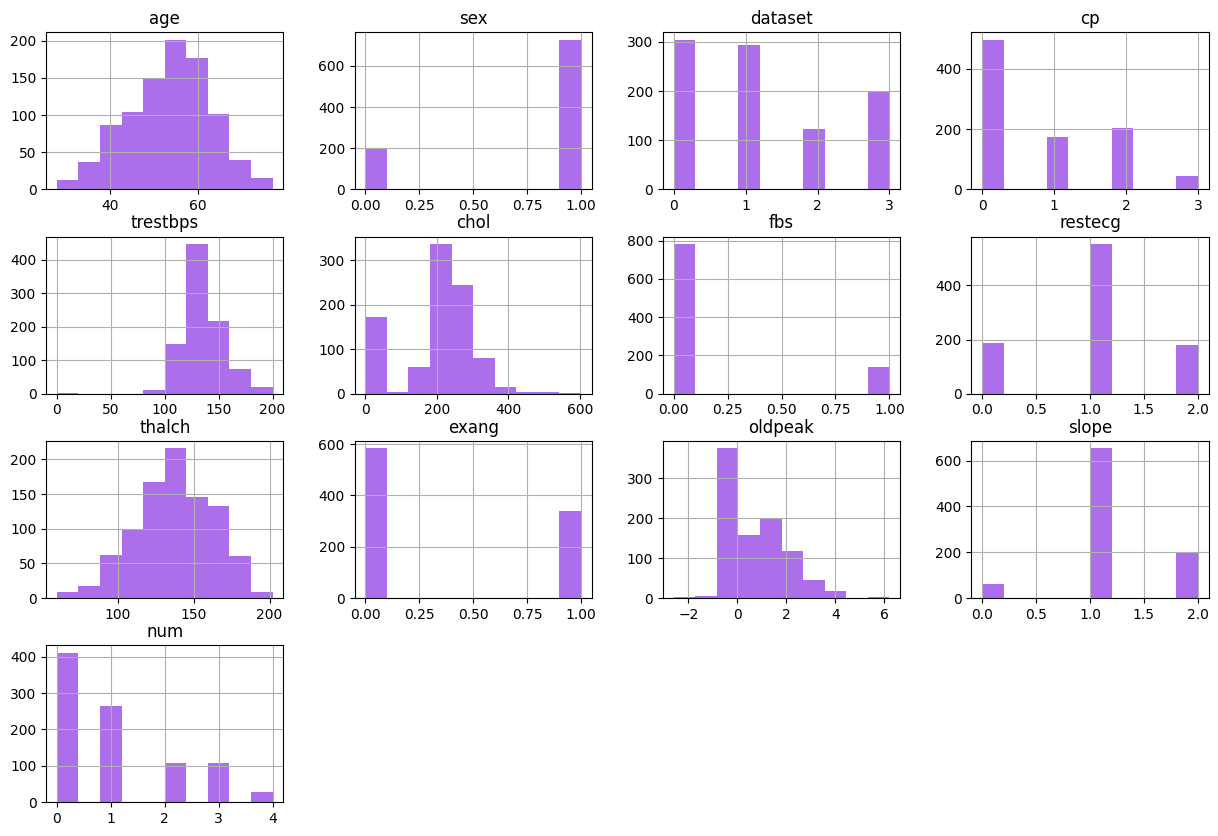

In [109]:
df_cor.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

### Seleccion de variables

In [110]:
X = df_cor.drop('num', axis=1)
y = df_cor['num']    


selector_one = SelectKBest(score_func=mutual_info_classif, k=10)  
X_mi = selector_one.fit_transform(X, y)

selected_features_mi = X.columns[selector_one.get_support()]
print("Features seleccionadas por mutual information:", selected_features_mi.tolist())

Features seleccionadas por mutual information: ['age', 'sex', 'dataset', 'cp', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak']


In [111]:
model = RandomForestClassifier(random_state=42)

selector = RFE(estimator=model, n_features_to_select=10)  
X_rfe = selector.fit_transform(X, y)

selected_features_rfe = X.columns[selector.get_support()]
print("Features seleccionadas por RFE:", selected_features_rfe.tolist())

Features seleccionadas por RFE: ['age', 'dataset', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']


In [112]:
#convertir en listas para comparar
set_mi = set(selected_features_mi)
set_rfe = set(selected_features_rfe)

common_features = set_mi.intersection(set_rfe)
print("Variables seleccionadas en común:", list(common_features))

Variables seleccionadas en común: ['restecg', 'dataset', 'age', 'cp', 'chol', 'thalch', 'exang', 'oldpeak']


In [113]:
#usamos variables en comun
X_final = X[list(common_features)]  
y_final = y

#split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test):
    # Predicciones
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    # Resultados
    print("=== Evaluación en TRAIN ===")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print()
    
    print("=== Evaluación en TEST ===")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

print("Arbol de decisiOn:")
evaluar_modelo(dt_model, X_train, X_test, y_train, y_test)


Arbol de decisiOn:
=== Evaluación en TRAIN ===
Accuracy: 0.9984472049689441
Precision: 0.9984554645169817
Recall: 0.9984472049689441
F1-Score: 0.9984437689969605

=== Evaluación en TEST ===
Accuracy: 0.5
Precision: 0.4899985883681536
Recall: 0.5
F1-Score: 0.49425663026026034


### Ev output
Podemos ver un claro overfitting, vamos a ver si volviendolo binario se regula, y si no aplicamos metodos de regularizacion. Tambien vamos a reducir la profundidad del arbol de decision

In [115]:
df_cor['num'] = df['num'].apply(lambda x:1 if x >= 2 else 0)

X_adj = df_cor.drop('num', axis=1)  
y_adj = df_cor['num']    

X_final_adj = X_adj[list(common_features)]  
y_final_adj = y_adj

#sobreescribe train y test
X_train, X_test, y_train, y_test = train_test_split(X_final_adj, y_final_adj, test_size=0.3, random_state=42)

dt_model_adj = DecisionTreeClassifier(max_depth=5, random_state=42) # ajusta

# Entrenar el modelo
dt_model_adj.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [116]:
print("Arbol de decision después de ajustar:")
evaluar_modelo(dt_model_adj, X_train, X_test, y_train, y_test)

Arbol de decision después de ajustar:
=== Evaluación en TRAIN ===
Accuracy: 0.8726708074534162
Precision: 0.8696331646642206
Recall: 0.8726708074534162
F1-Score: 0.8665064409770453

=== Evaluación en TEST ===
Accuracy: 0.7789855072463768
Precision: 0.766532919553201
Recall: 0.7789855072463768
F1-Score: 0.767360604270207


### Grid Search and Cross val

In [117]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

base_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           cv=5,                
                           scoring='accuracy',    
                           n_jobs=-1,          
                           verbose=1)

grid_search.fit(X_train, y_train)

# Mejor modelo
best_dt_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

evaluar_modelo(best_dt_model, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
=== Evaluación en TRAIN ===
Accuracy: 0.8555900621118012
Precision: 0.8504462497229476
Recall: 0.8555900621118012
F1-Score: 0.8488093063200385

=== Evaluación en TEST ===
Accuracy: 0.7753623188405797
Precision: 0.762111801242236
Recall: 0.7753623188405797
F1-Score: 0.7628334301034871


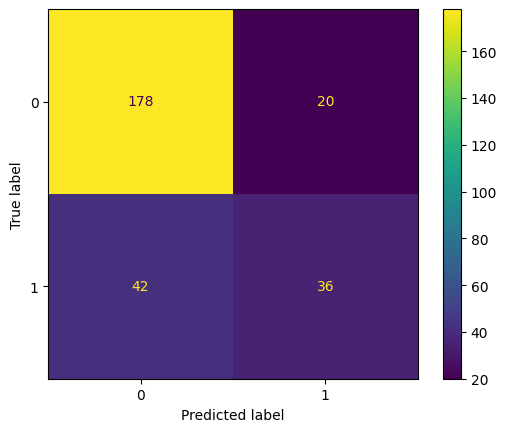

In [118]:
y_pred_test = best_dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

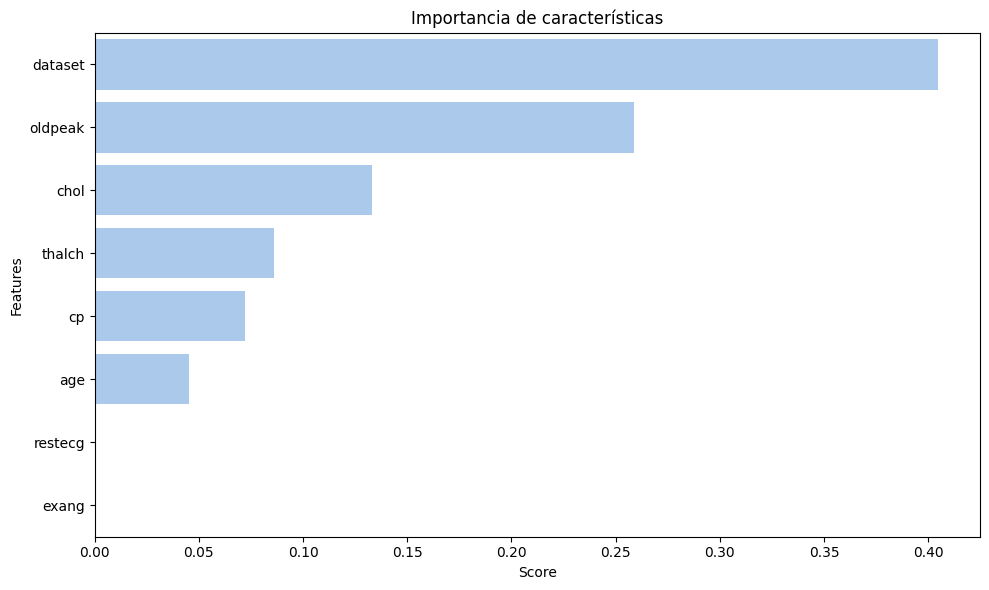

In [119]:
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importancia de características")
plt.xlabel("Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Reflexion final

A lo largo de este trabajo se implementaron diferentes métodos de selección de características y modelado supervisado para abordar un problema de clasificación binaria. Se exploraron enfoques tipo filtro y wrapper para identificar las variables más relevantes, lo que permitió reducir la dimensionalidad sin perder capacidad predictiva. Inicialmente, el modelo presentó overfitting, evidenciado por una alta precisión en entrenamiento y bajo rendimiento en test. Sin embargo, al ajustar la cantidad de clases y ajustar parámetros, se logró un modelo más balanceado, con buena generalización y métricas estables. Este proceso evidenció la importancia de una adecuada selección de características y ajuste de hiperparámetros para construir modelos más robustos y eficientes.